In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
with open('../data/problemsF/FA012_tgt.mdl', 'rb') as f:
    buf = f.read()
    R = buf[0]
    buf = np.frombuffer(buf, dtype=np.uint8, offset=1)

def to_volume(buf, R):
    arr = np.zeros((R, R, R), np.uint8)
    for x in range(R):
        for y in range(R):
            for z in range(R):
                bit = (x * R + y) * R + z
                voxel = 0 if (buf[bit // 8] & (1 << (bit & 7))) == 0 else 1
                arr[x, y, z] = voxel
    return arr

arr = to_volume(buf, R)

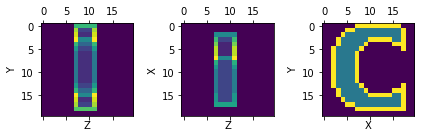

In [25]:
fig, ax = plt.subplots(1, 3)
ax[0].matshow(arr.sum(axis=0)); ax[0].set_ylabel('Y');  ax[0].set_xlabel('Z')
ax[1].matshow(arr.sum(axis=1)); ax[1].set_ylabel('X');  ax[1].set_xlabel('Z')
ax[2].matshow(arr.sum(axis=2).T); ax[2].set_ylabel('Y');  ax[2].set_xlabel('X')
fig.tight_layout()